In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('battery1.csv')

In [3]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,RUL,cycles
0,0.015435,1.066090,1.066573,32.149495,30.830272,33.433834,10.043408,1.0,1009.0,0
1,0.015399,1.066964,1.067455,32.106606,30.779943,33.403964,10.043255,2.0,1008.0,1
2,0.015365,1.067611,1.068285,32.088511,30.824746,33.325268,10.042333,3.0,1007.0,2
3,0.015326,1.068164,1.068708,32.086306,30.804544,33.304202,10.052677,4.0,1006.0,3
4,0.015309,1.068695,1.069094,32.041147,30.791834,33.257191,10.042382,5.0,1005.0,4


In [6]:
df = df.drop(columns = ['RUL', 'cycles'])

In [8]:
df['SOH'] = df['QD'] / df['IR']

# EDA

In [11]:
df.describe()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,SOH
count,46581.000000,46581.000000,46581.000000,46581.000000,46581.000000,46581.000000,46581.000000,46581.000000,46581.000000
mean,0.015531,1.027972,1.028052,35.442638,32.562142,38.491952,10.415121,575.299908,66.346442
std,0.000667,0.043537,0.043777,1.717072,1.015748,2.479463,0.719935,388.417908,4.403492
min,0.009652,0.880091,0.880005,31.002614,28.032270,31.209373,10.024057,1.000000,41.562476
25%,0.015182,1.014360,1.014426,34.112411,31.818195,36.659229,10.043220,265.000000,65.023430
50%,0.015489,1.042370,1.042570,35.480034,32.446671,38.964328,10.045978,530.000000,67.311767
75%,0.015788,1.058615,1.058822,36.727848,33.323634,40.215538,10.925527,807.000000,69.033164
max,0.021188,1.103005,1.099805,41.440286,36.691219,44.662853,24.003052,1934.000000,107.840294


In [13]:
df.isna().sum()

IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
cycle         0
SOH           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46581 entries, 0 to 46580
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IR          46581 non-null  float64
 1   QC          46581 non-null  float64
 2   QD          46581 non-null  float64
 3   Tavg        46581 non-null  float64
 4   Tmin        46581 non-null  float64
 5   Tmax        46581 non-null  float64
 6   chargetime  46581 non-null  float64
 7   cycle       46581 non-null  float64
 8   SOH         46581 non-null  float64
dtypes: float64(9)
memory usage: 3.2 MB


<AxesSubplot:>

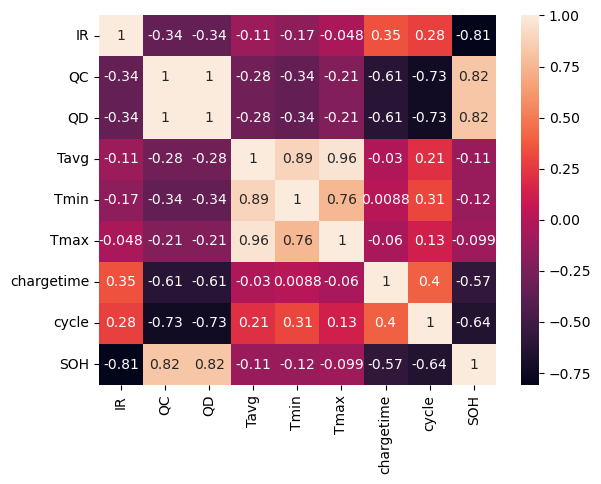

In [15]:
sns.heatmap(df.corr(), annot = True)

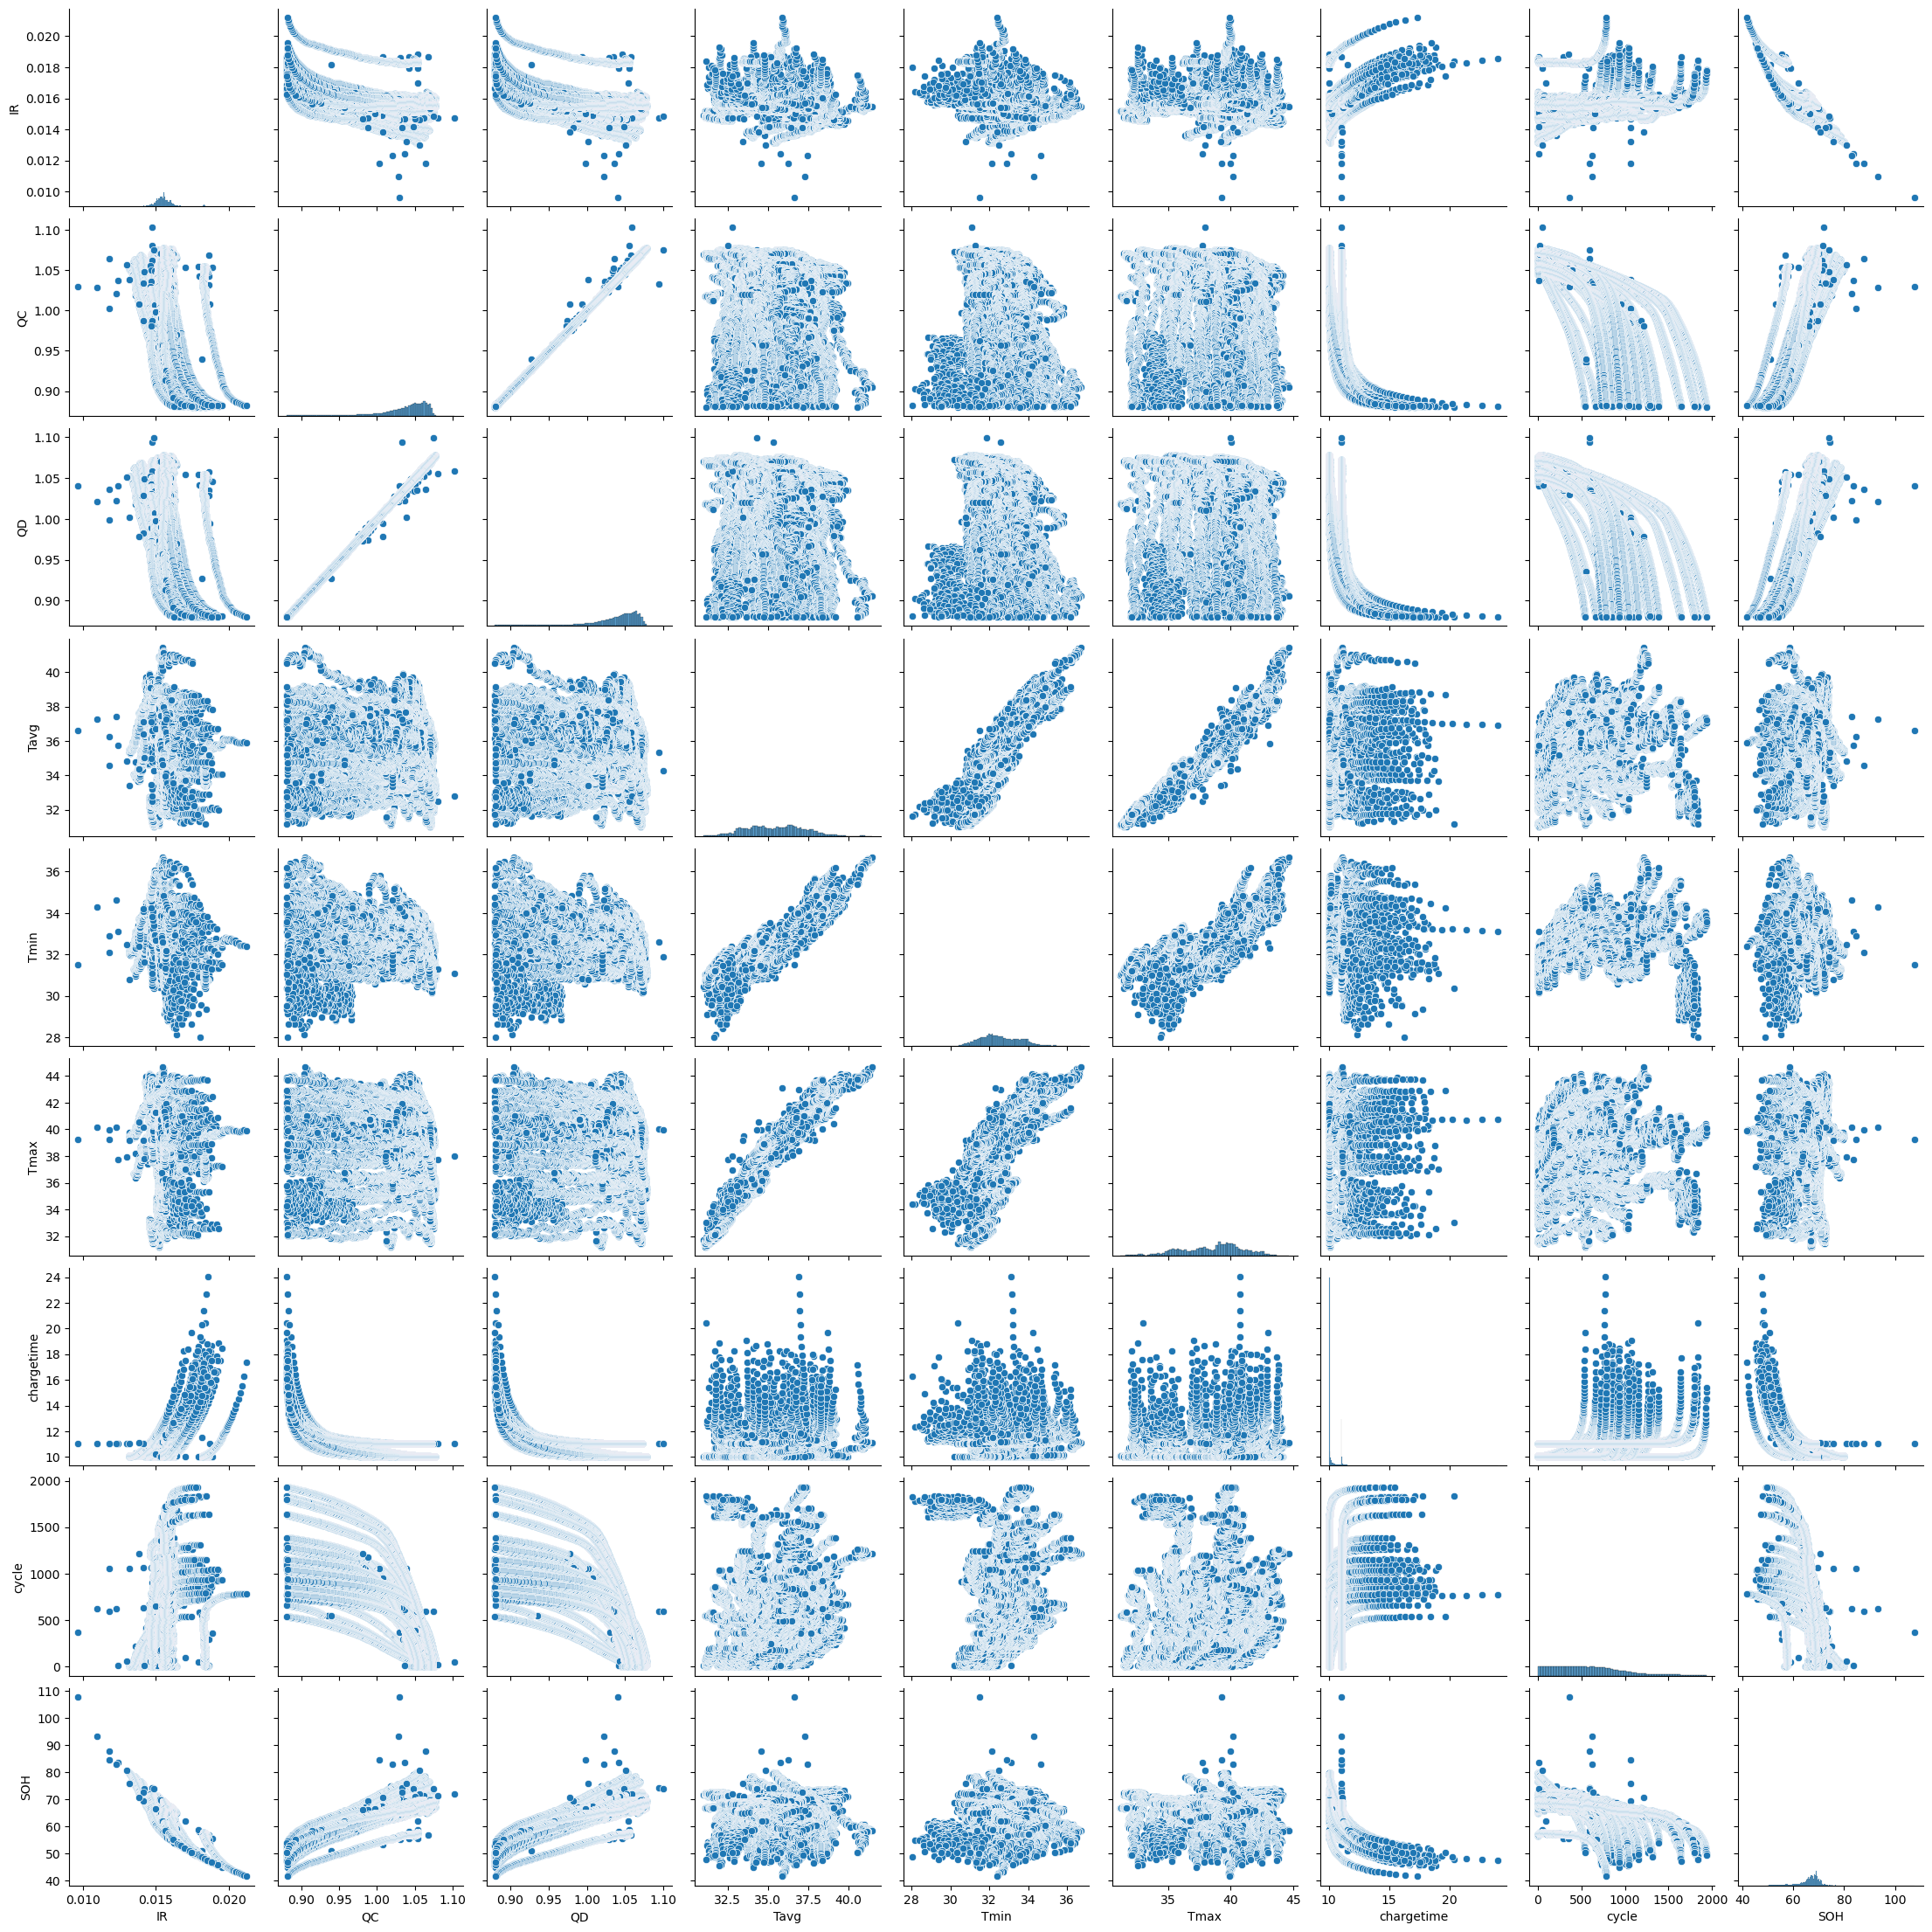

In [18]:

sns.pairplot(df[['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle', 'SOH']])
plt.show()


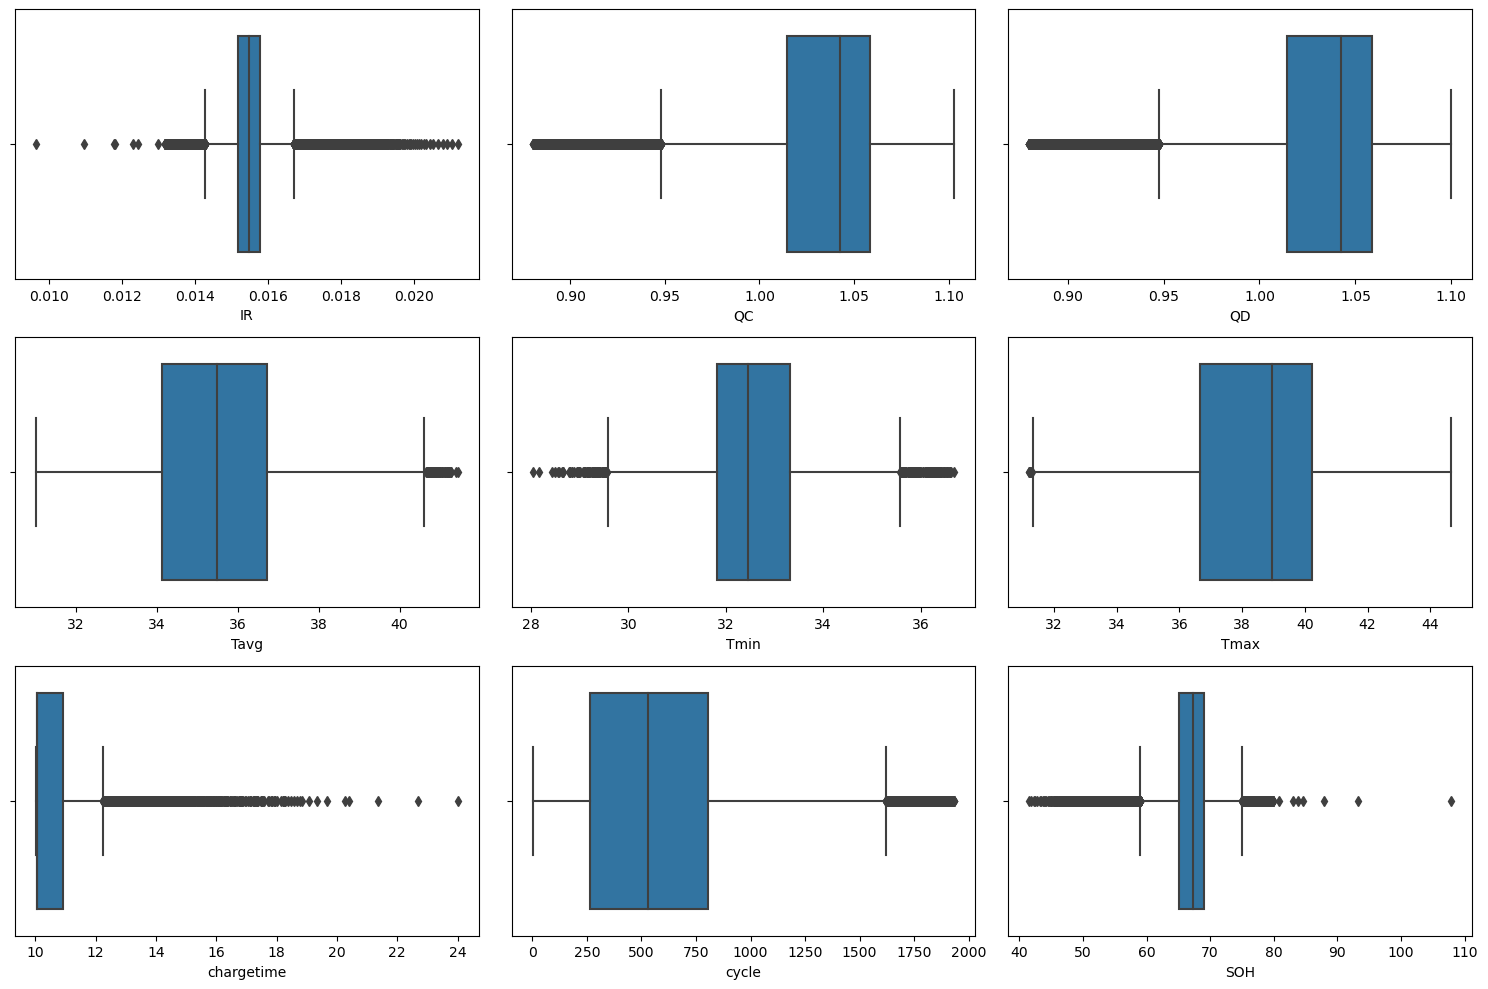

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle', 'SOH']):
    sns.boxplot(x=df[column], ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()


# Machine Learning 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Assuming df is your DataFrame
features = ['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle']
target = 'SOH'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [22]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
print("Linear Regression:")
print(f'Mean Squared Error: {mean_squared_error(y_test, linear_predictions)}')
print(f'R-squared: {r2_score(y_test, linear_predictions)}')


Linear Regression:
Mean Squared Error: 0.103908530215474
R-squared: 0.9945379507955006


## Decision Tree Regressor

In [23]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, dt_predictions)}')
print(f'R-squared: {r2_score(y_test, dt_predictions)}')



Decision Tree Regressor:
Mean Squared Error: 0.01768558697741298
R-squared: 0.9990703405574041


## Random Forest Regressor

In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}')
print(f'R-squared: {r2_score(y_test, rf_predictions)}')



Random Forest Regressor:
Mean Squared Error: 0.002268770145101999
R-squared: 0.9998807399725456


## Support Vector Regressor (SVR)

In [25]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
print("\nSupport Vector Regressor (SVR):")
print(f'Mean Squared Error: {mean_squared_error(y_test, svr_predictions)}')
print(f'R-squared: {r2_score(y_test, svr_predictions)}')



Support Vector Regressor (SVR):
Mean Squared Error: 10.801353416160865
R-squared: 0.4322167418602041


## Gradient Boosting Regressor

In [26]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("\nGradient Boosting Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, gb_predictions)}')
print(f'R-squared: {r2_score(y_test, gb_predictions)}')



Gradient Boosting Regressor:
Mean Squared Error: 0.030973403858202457
R-squared: 0.998371854018592


## Bagging with Random Forest

In [27]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Bagging with Random Forest
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

print("Bagging with Random Forest:")
print(f'Mean Squared Error: {mean_squared_error(y_test, bagging_predictions)}')
print(f'R-squared: {r2_score(y_test, bagging_predictions)}')


Bagging with Random Forest:
Mean Squared Error: 0.005333460124887193
R-squared: 0.9997196416735762


## Boosting with AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostRegressor

# Boosting with AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

print("\nBoosting with AdaBoost:")
print(f'Mean Squared Error: {mean_squared_error(y_test, adaboost_predictions)}')
print(f'R-squared: {r2_score(y_test, adaboost_predictions)}')



Boosting with AdaBoost:
Mean Squared Error: 1.0611882137223567
R-squared: 0.9442176477083567


## Performance of different machine learning techniques

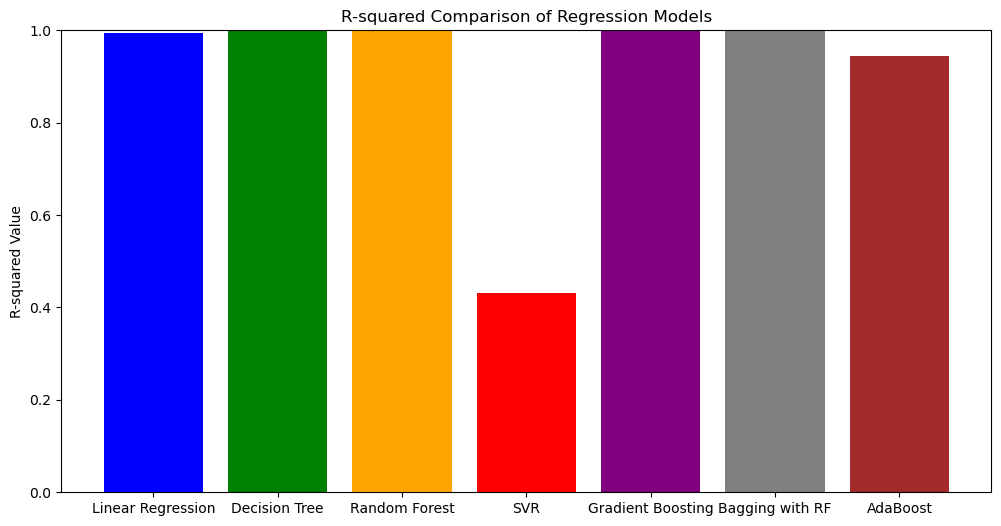

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their predictions
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting', 'Bagging with RF', 'AdaBoost']
predictions = [linear_predictions, dt_predictions, rf_predictions, svr_predictions, gb_predictions, bagging_predictions, adaboost_predictions]

# Calculate R-squared values for each model
r_squared_values = [r2_score(y_test, pred) for pred in predictions]

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(models, r_squared_values, color=['blue', 'green', 'orange', 'red', 'purple', 'gray', 'brown'])
plt.ylabel('R-squared Value')
plt.title('R-squared Comparison of Regression Models')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()


<p> From this plot we can see that Linear Regression, Decision Tree, Random Forest, Gradient Boosting and Bagging with RF  have higher accuracy. We can use them for prediction </p>

# ANN

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test set
nn_predictions = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, nn_predictions)
r2_nn = r2_score(y_test, nn_predictions)

print("Deep Learning (Neural Network):")
print(f'Mean Squared Error: {mse_nn}')
print(f'R-squared: {r2_nn}')






292/292 [==============================] - 1s 1ms/step
Deep Learning (Neural Network):
Mean Squared Error: 0.003839587461560752
R-squared: 0.9997981684891843
